In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
raw_data = pd.read_excel('merged_exchange_variables_0208.xlsx',header=0)

In [18]:
raw_data = raw_data[raw_data['total_volume'] > 1]
raw_data['log_vol'] = np.log(raw_data['total_volume'])
raw_data = raw_data[raw_data['log_vol'] > 1]

In [19]:
raw_data = raw_data[~pd.isnull(raw_data['Takerfee'])]
raw_data.reset_index(inplace=True,drop=True)
raw_data.head()

,exchange,total_volume,NumCoin,BaseCUR,Location,Takerfee,Makerfee,leverage,api_rest,api_rest_code,api_socket,api_socket_code,other_api,library_support,api_rest_testable,api_socket_testable,log_vol
0,Upbit,3.982549e+09,215,NaN,Korea,0.00050,0.00050,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.105188
1,OKEx,3.421020e+09,425,NaN,Hongkong,0.00140,0.00100,20.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,21.953205
2,Bitfinex,2.616778e+09,103,USD,Hongkong,0.00200,0.00100,3.3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,21.685210
3,Binance,2.571444e+09,260,USD,China,0.00100,0.00100,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,21.667733
4,BitMEX,2.458920e+09,260,USD,USA,0.00075,-0.00025,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,21.622988


In [20]:
raw_data['leverage'].fillna(value=1, inplace=True)

In [21]:
raw_data['Takerfee'] = raw_data['Takerfee']*100
raw_data['Makerfee'] = raw_data['Makerfee']*100
raw_data['TpM'] = raw_data['Takerfee'] + raw_data['Makerfee']

In [22]:
raw_data.describe()

C:\Users\Rocku\Anaconda64\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,total_volume,NumCoin,Takerfee,Makerfee,leverage,api_rest,api_rest_code,api_socket,api_socket_code,other_api,library_support,api_rest_testable,api_socket_testable,log_vol,TpM
count,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,46.000000,46.000000,47.000000,47.000000,47.000000,47.000000
mean,5.703076e+08,112.000000,0.219043,0.133830,5.395106,0.957447,0.617021,0.468085,0.276596,0.173913,0.282609,0.106383,0.021277,18.760197,0.352872
std,9.730584e+08,126.176894,0.208232,0.157111,15.115120,0.204030,0.491369,0.504375,0.452151,0.383223,0.455243,0.311661,0.145865,1.785029,0.330400
min,4.861216e+06,11.000000,-0.010000,-0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.396799,-0.060000
25%,4.228723e+07,24.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,17.559655,0.157500
50%,1.094795e+08,47.000000,0.200000,0.100000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,18.511248,0.300000
75%,4.231090e+08,195.500000,0.250000,0.200000,3.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,19.859589,0.400000
max,3.982549e+09,477.000000,1.000000,0.870000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.105188,1.740000


In [23]:
raw_data.columns

Index(['exchange', 'total_volume', 'NumCoin', 'BaseCUR', 'Location',
       'Takerfee', 'Makerfee', 'leverage', 'api_rest', 'api_rest_code',
       'api_socket', 'api_socket_code', 'other_api', 'library_support',
       'api_rest_testable', 'api_socket_testable', 'log_vol', 'TpM'],
      dtype='object')

In [26]:
import statsmodels.graphics.api as smg

cor_data = raw_data[['NumCoin','TpM', 'leverage', 'log_vol', 'api_rest', 
                     'api_rest_code','api_socket', 'api_socket_code', 
                     'api_rest_testable', 'api_socket_testable']]
cor_data = cor_data.astype(float)
corr_table = cor_data.corr('pearson')
corr_table

,NumCoin,TpM,leverage,log_vol,api_rest,api_rest_code,api_socket,api_socket_code,api_rest_testable,api_socket_testable
NumCoin,1.000000,-0.076569,0.244122,0.280954,-0.395198,-0.052245,0.030060,0.177187,0.103377,-0.010631
TpM,-0.076569,1.000000,-0.202934,-0.301147,-0.030396,0.067180,-0.145870,-0.048362,-0.193036,-0.023850
leverage,0.244122,-0.202934,1.000000,0.313874,0.061964,0.154668,0.224922,0.279484,0.444514,-0.020658
log_vol,0.280954,-0.301147,0.313874,1.000000,-0.108990,-0.121840,0.246059,0.181947,0.209486,0.244216
api_rest,-0.395198,-0.030396,0.061964,-0.108990,1.000000,0.267591,0.197765,0.130359,0.072739,0.031083
api_rest_code,-0.052245,0.067180,0.154668,-0.121840,0.267591,1.000000,-0.138107,0.193614,0.129874,0.116160
api_socket,0.030060,-0.145870,0.224922,0.246059,0.197765,-0.138107,1.000000,0.659160,0.229511,0.157174
api_socket_code,0.177187,-0.048362,0.279484,0.181947,0.130359,0.193614,0.659160,1.000000,0.095187,-0.091170
api_rest_testable,0.103377,-0.193036,0.444514,0.209486,0.072739,0.129874,0.229511,0.095187,1.000000,0.427327
api_socket_testable,-0.010631,-0.023850,-0.020658,0.244216,0.031083,0.116160,0.157174,-0.091170,0.427327,1.000000


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Column"] = cor_data.columns
vif["VIF Factor"] = [variance_inflation_factor(cor_data.values, i) for i in range(cor_data.shape[1])]
vif.round(1)

,Column,VIF Factor
0,NumCoin,2.5
1,TpM,2.2
2,leverage,1.7
3,log_vol,28.2
4,api_rest,27.5
5,api_rest_code,3.9
6,api_socket,5.0
7,api_socket_code,3.5
8,api_rest_testable,1.9
9,api_socket_testable,1.5


In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# eq = 'log_vol ~ leverage + NumCoin + TpM + C(Location)'
eq = 'log_vol ~ leverage + (NumCoin) + TpM + C(Location) + C(api_rest) + C(api_rest_code)\
+ C(api_socket) + C(api_socket_code) + C(api_rest_testable) + C(api_socket_testable)'

model = smf.ols(eq, data=raw_data).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_vol   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     2.175
Date:                Thu, 08 Feb 2018   Prob (F-statistic):             0.0357
Time:                        23:25:12   Log-Likelihood:                -64.850
No. Observations:                  47   AIC:                             179.7
Df Residuals:                      22   BIC:                             226.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        17.6308      2.226      7.919      0.000      13.013      22.248
C(Location)[T.Brazil]                            -0.5479      1.810     -0.303      0.765      -4.301       3.205
C(Location)[T.China]                              1.2345      1.599      0.772      0.448      -2.082       4.551
C(Location)[T.Hongkong]                           1.2830      1.937      0.662      0.515      -2.734       5.300
C(Location)[T.Indonesia]                          1.2530      2.219      0.565      0.578      -3.350       5.856
C(Location)[T.Japan]                              2.3391      2.009      1.164      0.257      -1.828       6.506
C(Location)[T.Korea]                              3.0973      1.772      1.748      0.094      -0.578       6.772
C(Location)[T.Luxembourg]                         2.9953      1.962      1.527      0.141      -1.073       7.064
C(Location)[T.Poland]                             0.5895      2.153      0.274      0.787      -3.876       5.055
C(Location)[T.Russia]                            -1.1098      2.632     -0.422      0.677      -6.568       4.348
C(Location)[T.Singapore]                          1.6933      2.193      0.772      0.448      -2.854       6.240
C(Location)[T.St. Vincent and the Grenadines]    -0.5645      2.279     -0.248      0.807      -5.291       4.162
C(Location)[T.Turkey]                            -3.6206      2.751     -1.316      0.202      -9.325       2.084
C(Location)[T.UK]                                 0.3172      1.722      0.184      0.856      -3.254       3.889
C(Location)[T.USA]                                2.4357      1.820      1.338      0.195      -1.339       6.211
C(Location)[T.Ukraine]                            0.1664      2.427      0.069      0.946      -4.866       5.199
C(api_rest)[T.1.0]                               -1.1492      1.755     -0.655      0.519      -4.789       2.491
C(api_rest_code)[T.1.0]                          -0.4132      0.631     -0.655      0.519      -1.722       0.896
C(api_socket)[T.1.0]                              0.1769      0.800      0.221      0.827      -1.482       1.836
C(api_socket_code)[T.1.0]                         0.5987      1.084      0.552      0.586      -1.650       2.847
C(api_rest_testable)[T.1.0]                      -0.6721      1.136     -0.592      0.560      -3.028       1.683
C(api_socket_testable)[T.1.0]                     4.0278      2.036      1.978      0.061      -0.195       8.251
leverage                                          0.0141      0.020      0.703      0.489      -0.028       0.056
NumCoin                                           0.0062      0.003      2.246      0.035       0.000       0.012
TpM  

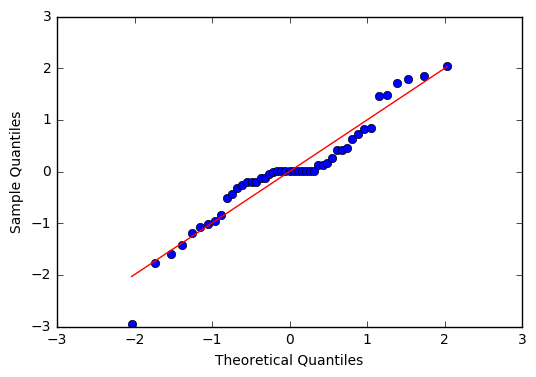

In [51]:
res = model.resid # residuals
fig = sm.qqplot(res,line='r')

In [67]:
coin_group = raw_data.groupby(by='BigCoin')

In [68]:
len(raw_data.loc[raw_data['BigCoin'] == 1,'Coin'])

256

In [69]:
coin_group.describe()

C:\Users\Rocku\Anaconda64\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


CurRatio    Makerfee      MinTrade     NumCoin         Price  \
BigCoin                                                                         
0       count  269.000000  269.000000  2.690000e+02  269.000000  2.690000e+02   
        mean     0.006246    0.120446  3.604467e-03  242.234201  1.084690e+01   
        std      0.033717    0.080305  9.466055e-03  147.571792  4.925853e+01   
        min      0.000000   -0.050000  1.000000e-08    3.000000  9.100000e-07   
        25%      0.000000    0.015000  1.000000e-04  118.000000  7.369900e-02   
        50%      0.000500    0.100000  1.000000e-04  196.000000  3.600100e-01   
        75%      0.002500    0.200000  1.000000e-02  351.000000  2.290000e+00   
        max      0.501300    0.300000  1.000000e-01  563.000000  5.811000e+02   
1       count  256.000000  256.000000  2.560000e+02  256.000000  2.560000e+02   
        mean     0.124462    0.148301  7.156383e-03   88.503906  3.089268e+03   
        std      0.236723    0.151852  2.101459e-02  128.455898  4.673641e+03   
        min      0.000000   -0.050000  1.000000e-08    1.000000  2.436550e-01   
        25%      0.005325    0.015000  1.000000e-04   11.000000  9.963500e+01   
        50%      0.021650    0.150000  5.000000e-04   32.000000  4.601850e+02   
        75%      0.091175    0.200000  6.250000e-03   99.000000  1.561962e+03   
        max      1.000000    0.870000  1.000000e-01  563.000000  1.281860e+04   

                 Takerfee         TmM         TpM  WithdrawBTC    api_rest  \
BigCoin                                                                      
0       count  269.000000  269.000000  269.000000    80.000000  269.000000   
        mean     0.179182    0.000587    0.299628     0.000791    1.000000   
        std      0.070859    0.000644    0.137066     0.000189    0.000000   
        min     -0.010000    0.000000   -0.060000     0.000000    1.000000   
        25%      0.100000    0.000000    0.200000          NaN    1.000000   
        50%      0.200000    0.000400    0.350000          NaN    1.000000   
        75%      0.200000    0.001000    0.400000          NaN    1.000000   
        max      0.430000    0.003000    0.730000     0.001000    1.000000   
1       count  256.000000  256.000000  256.000000   128.000000  256.000000   
        mean     0.219863    0.000716    0.368164     0.000699    0.996094   
        std      0.170861    0.001317    0.295218     0.000692    0.062500   
        min     -0.010000    0.000000   -0.060000     0.000000    0.000000   
        25%      0.150000    0.000000    0.200000          NaN    1.000000   
        50%      0.200000    0.000000    0.350000          NaN    1.000000   
        75%      0.250000    0.001000    0.400000          NaN    1.000000   
        max      1.000000    0.010000    1.740000     0.005000    1.000000   

                   ...       api_soap  api_socket  api_socket_code  \
BigCoin            ...                                               
0       count      ...          269.0  269.000000       269.000000   
        mean       ...            0.0    0.297398         0.211896   
        std        ...            0.0    0.457965         0.409413   
        min        ...            0.0    0.000000         0.000000   
        25%        ...            0.0    0.000000         0.000000   
        50%        ...            0.0    0.000000         0.000000   
        75%        ...            0.0    1.000000         0.000000   
        max        ...            0.0    1.000000         1.000000   
1       count      ...          256.0  256.000000       256.000000   
        mean       ...            0.0    0.390625         0.238281   
        std        ...            0.0    0.488846         0.426867   
        min        ...            0.0    0.000000         0.000000   
        25%        ...            0.0    0.000000         0.000000   
        50%        ...            0.0    0.000000         0.000000   
        75%        ...           

In [61]:
from scipy import stats
rvs1 = raw_data.loc[raw_data['BigCoin'] == 1,'leverage']
rvs2 = raw_data.loc[raw_data['BigCoin'] == 0,'leverage']

stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=2.8175632593938982, pvalue=0.0050220108710192744)